# Bike Sharing Assignment

## Importing and Understanding Data

In [1]:
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries for now
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [3]:
# Import BoomBikes dataset
df = pd.read_csv('day.csv')

## Data check

In [4]:
# Checking the shape of the dataset
df.shape

(730, 16)

In [5]:
# Checking the column names
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
# Checking the info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Observations**
- There are no nullable columns in the dataset

In [7]:
# Checking the summary statistics of numeric variables
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Dropping unnecessary columns

### instant

This is an index column and not required

In [8]:
df.drop('instant',axis=1,inplace=True)

### dteday

We already have year and month columns. So we can remove this

In [9]:
df.drop('dteday',axis=1,inplace=True)

## Handling categorical columns


Below are the list of categorical columns that we need to convert to numeric. There are two steps
- Convert categorical to numeric columns
- Do OHE (One Hot Encoding) to handle these columns

- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

### season

In [10]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [11]:
def fn_season(col):
    if col == 1:
        return 'spring'
    elif col == 2:
        return 'summer'
    elif col == 3:
        return 'fall'
    elif col == 4:
        return 'winter'

In [12]:
df.season.apply(fn_season).value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [13]:
df.season = df.season.apply(fn_season)

In [14]:
# Check season column value
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### yr

In [15]:
df.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [16]:
def fn_yr(col):
    if col == 0:
        return '2018'
    elif col == 1:
        return '2019'

In [17]:
df.yr.apply(fn_yr).value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [18]:
df.yr = df.yr.apply(fn_yr)

In [19]:
# Check season column value
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### mnth

In [20]:
df.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [21]:
month_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
month_map

{1: 'Jan',
 2: 'Feb',
 3: 'Mar',
 4: 'Apr',
 5: 'May',
 6: 'Jun',
 7: 'Jul',
 8: 'Aug',
 9: 'Sep',
 10: 'Oct',
 11: 'Nov',
 12: 'Dec'}

In [22]:
df.mnth.map(month_map).value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [23]:
df.mnth = df.mnth.map(month_map)

In [24]:
# Check season column value
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### holiday

In [25]:
df.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [26]:
def fn_holiday(col):
    if col == 0:
        return 'no'
    elif col == 1:
        return 'yes'

In [27]:
df.holiday.apply(fn_holiday).value_counts()

no     709
yes     21
Name: holiday, dtype: int64

In [28]:
df.holiday = df.holiday.apply(fn_holiday)

In [29]:
# Check season column value
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,no,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,no,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,no,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,no,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,no,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### weekday

In [30]:
df.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [31]:
week_map = {0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}
week_map

{0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}

**Note**
- As explicit mapping for weekday is not provided, I am considering `0` as Sunday upto `6` as Saturday in that order

In [32]:
df.weekday.map(week_map).value_counts()

Mon    105
Tue    105
Wed    104
Thu    104
Fri    104
Sat    104
Sun    104
Name: weekday, dtype: int64

In [33]:
df.weekday = df.weekday.map(week_map)

In [34]:
# Check season column value
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,no,Mon,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,no,Tue,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,no,Wed,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,no,Thu,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,no,Fri,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### workingday

In [35]:
df.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [36]:
def fn_workingday(col):
    if col == 0:
        return 'no'
    elif col == 1:
        return 'yes'

In [37]:
df.workingday.apply(fn_workingday).value_counts()

yes    504
no     226
Name: workingday, dtype: int64

In [38]:
df.workingday = df.workingday.apply(fn_workingday)

In [39]:
# Check season column value
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,no,Mon,yes,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,no,Tue,yes,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,no,Wed,yes,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,no,Thu,yes,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,no,Fri,yes,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### weathersit

In [40]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [41]:
def fn_weathersit(col):
    if col == 1:
        return 'Clear'
    elif col == 2:
        return 'Mist'
    elif col == 3:
        return 'LightSnow'
    elif col == 4:
        return 'HeavyRain'

In [42]:
df.weathersit.apply(fn_weathersit).value_counts()

Clear        463
Mist         246
LightSnow     21
Name: weathersit, dtype: int64

In [43]:
df.weathersit = df.weathersit.apply(fn_weathersit)

In [44]:
# Check season column value
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,no,Mon,yes,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,no,Tue,yes,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,no,Wed,yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,no,Thu,yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,no,Fri,yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Univariate Analysis

## Numerical columns

In [45]:
df.select_dtypes(include=['int','float']).columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

### temp

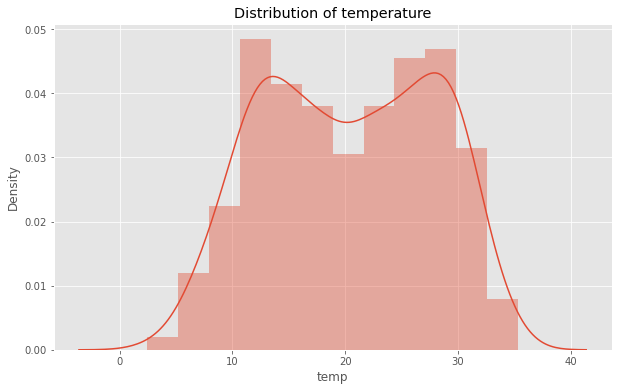

In [46]:
plt.figure(figsize=[10,6])
sns.distplot(df.temp)
plt.title("Distribution of temperature")
plt.show()

**Observations**
- We can see that there is increase in bike rentals from temperatures (10 - 15) and (~25 - 30)
- There is a dip in bike rentals from temperatures (~15 - ~25)

### atemp

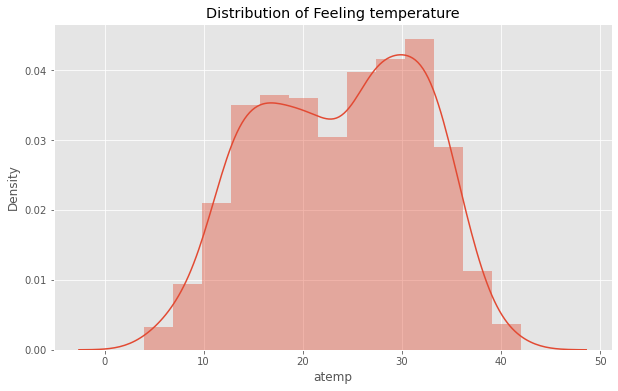

In [47]:
plt.figure(figsize=[10,6])
sns.distplot(df.atemp)
plt.title("Distribution of Feeling temperature")
plt.show()

**Observations**
- We can see that there is increase in bike rentals from feeling temperature (~25 - 32)

### hum

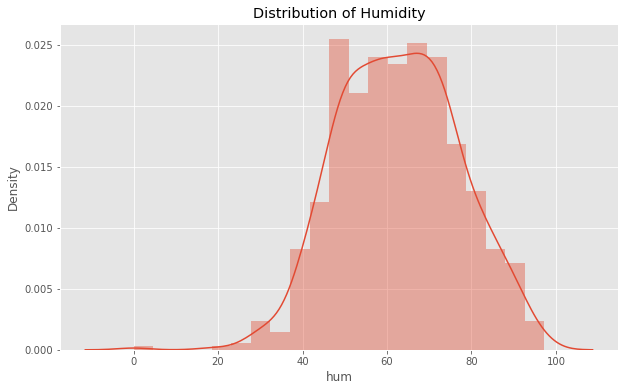

In [48]:
plt.figure(figsize=[10,6])
sns.distplot(df.hum)
plt.title("Distribution of Humidity")
plt.show()

**Observations**
- We can see that there is increase in demand for bike rentals in the humidity range ~50 to ~70

### windspeed

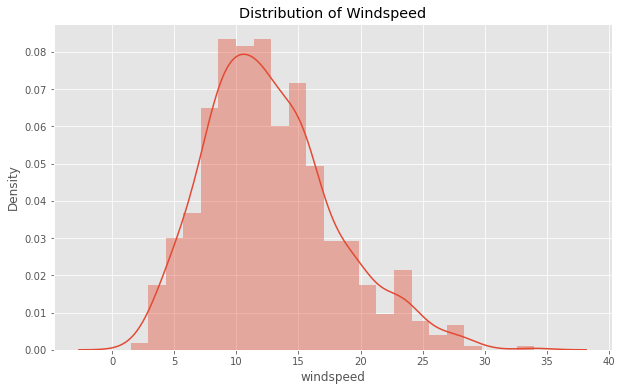

In [49]:
plt.figure(figsize=[10,6])
sns.distplot(df.windspeed)
plt.title("Distribution of Windspeed")
plt.show()

**Observations**
- We can see that most bike rentals in the Windspeed range ~8 to ~13

### casual

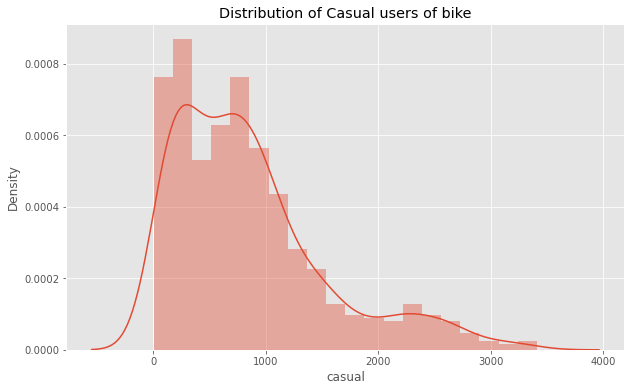

In [50]:
plt.figure(figsize=[10,6])
sns.distplot(df.casual)
plt.title("Distribution of Casual users of bike")
plt.show()

**Observations**
- We can see that most casual users of bike rentals are less than 1000

### registered

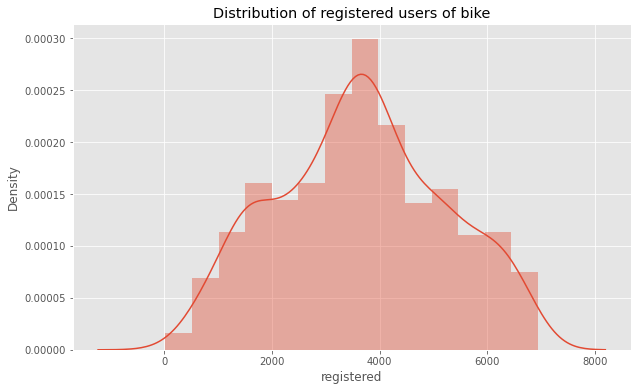

In [51]:
plt.figure(figsize=[10,6])
sns.distplot(df.registered)
plt.title("Distribution of registered users of bike")
plt.show()

**Observations**
- We can see that most registered users of bike rentals range between ~3500 to ~4000

### cnt

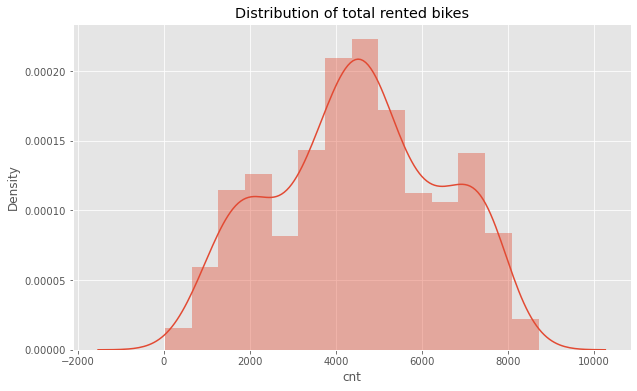

In [52]:
plt.figure(figsize=[10,6])
sns.distplot(df.cnt)
plt.title("Distribution of total rented bikes")
plt.show()

**Observations**
- We can see that most bike rentals are in the range between ~4000 to ~5000

## Categorical columns

In [53]:
# Find all the categorical columns in the dataset
df_categorical = df.select_dtypes(exclude=['float64','int64'])
df_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [54]:
# Total number of categorical columns
len(df_categorical.columns)

7

### Countplot
- 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit'

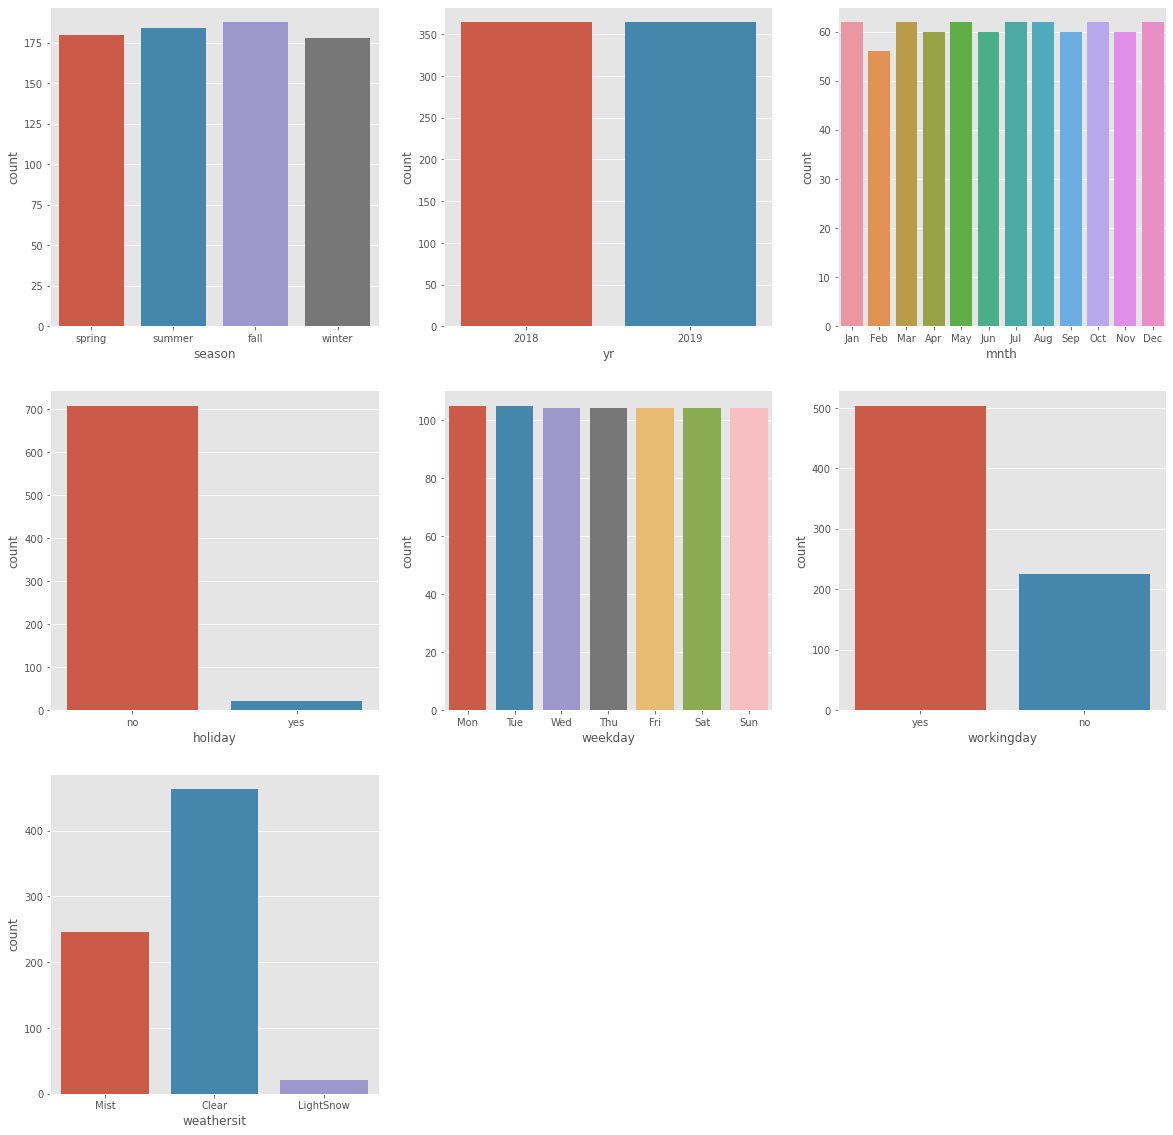

In [55]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.countplot(df.season)
plt.subplot(3,3,2)
sns.countplot(df.yr)
plt.subplot(3,3,3)
sns.countplot(df.mnth)
plt.subplot(3,3,4)
sns.countplot(df.holiday)
plt.subplot(3,3,5)
sns.countplot(df.weekday)
plt.subplot(3,3,6)
sns.countplot(df.workingday)
plt.subplot(3,3,7)
sns.countplot(df.weathersit)
plt.show()

**Observations**
- Most of the bike rentals have been on weekdays and workingdays
- Most bike rentals have been on `Clear` weather

### Distplot
- 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit'

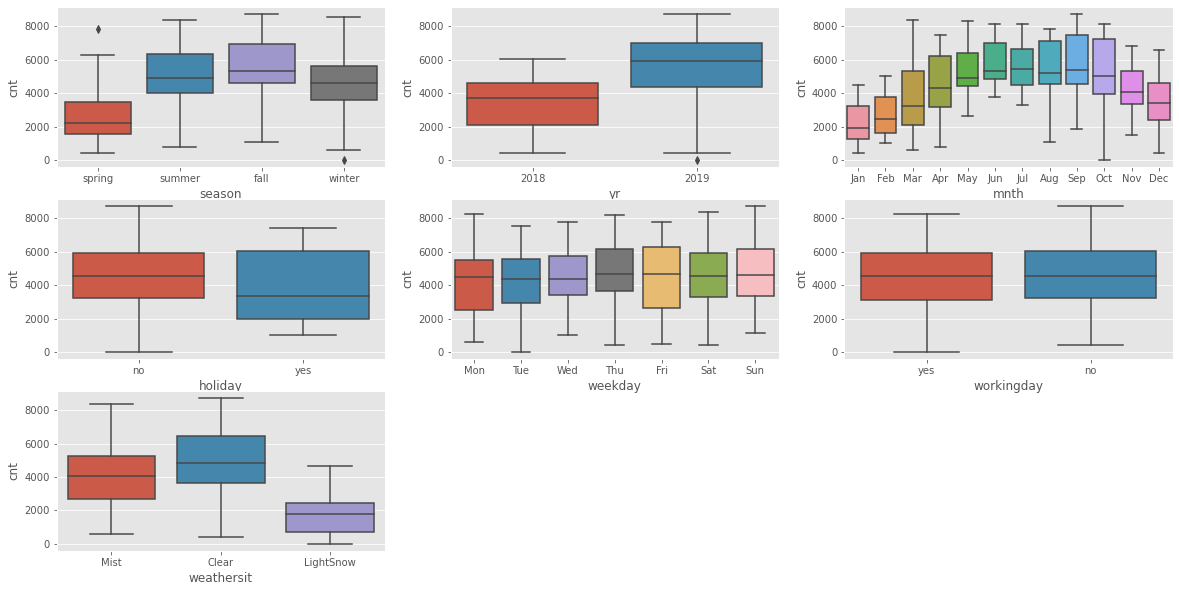

In [56]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.show()

**Observations**
- Most of the median bike rentals were on `fall` and `summer`
- Median bike rentals are around 6000 in `2019` compared to ~4000 in `2018`. The count of rentals have also increased in `2019`
- Median bike rentals has increased in `Clear` weather
- Median bike rentals count have increased in May,June,Jul,Aug,Sep and Oct

# Bivariate analysis

In [57]:
numerical_col = df.describe().columns

In [58]:
df[numerical_col].head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,14.902598,17.68695,69.6087,16.652113,131,670,801
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [59]:
# Check datatype of numerical columns
df[numerical_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        730 non-null    float64
 1   atemp       730 non-null    float64
 2   hum         730 non-null    float64
 3   windspeed   730 non-null    float64
 4   casual      730 non-null    int64  
 5   registered  730 non-null    int64  
 6   cnt         730 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 40.0 KB


## Pairplot to check pair-wise relationships

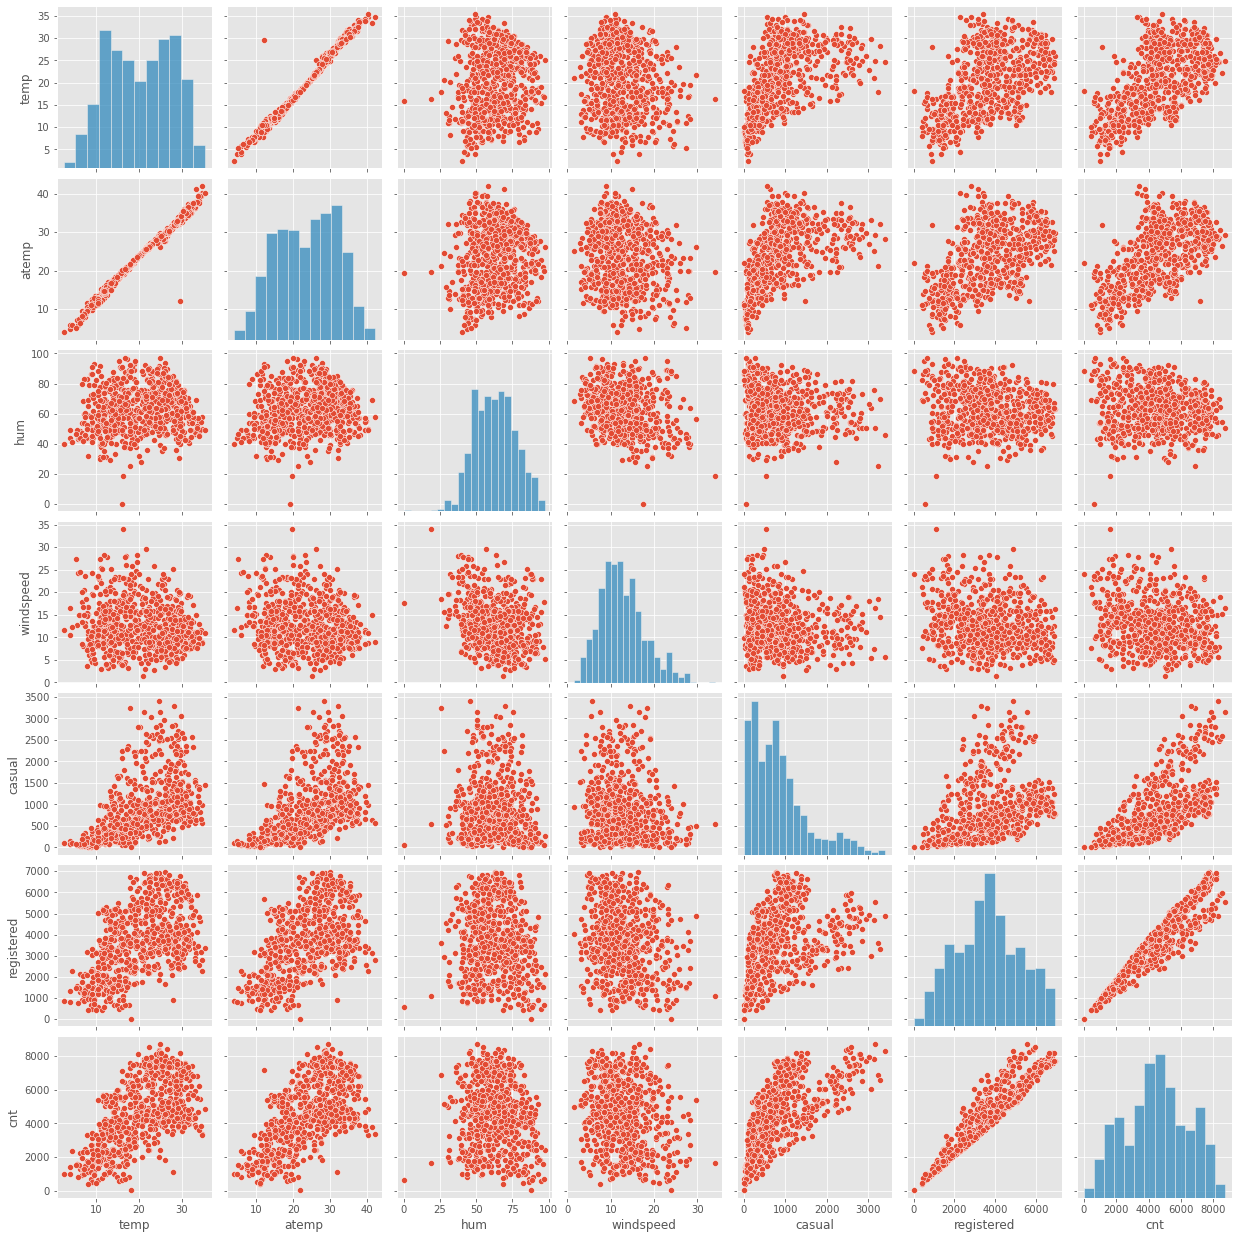

In [60]:
sns.pairplot(df[numerical_col])

**Observations**
- There is a positive linear correlation between `temp` and `atemp`. We should look at dropping one of these columns later on
- There is a positive linear correlation between `cnt` and `registered`. We should look at dropping `registered` later on

In [61]:
cor = df[numerical_col].corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


## Heatmap to check correlation

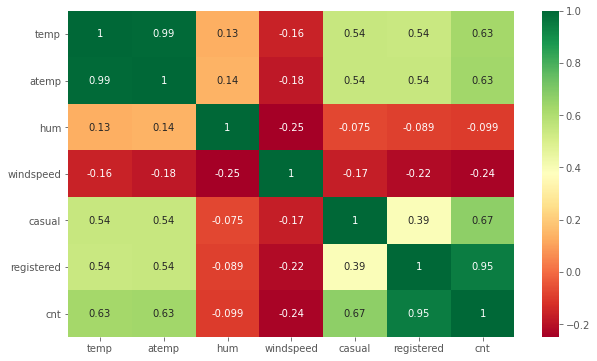

In [62]:
plt.figure(figsize=[10,6])
sns.heatmap(cor, cmap='RdYlGn', annot=True)
plt.show()

To analyze the data better, we will mask the bottom/top triangle of the heatmap as it is redundant
- To hide top part, use mask[np.tril_indices_from(mask)] = False
- To hide bottom part, use mask[np.triu_indices_from(mask)] = False

In [63]:
mask = np.array(cor)
mask

array([[ 1.        ,  0.99169618,  0.12856468, -0.15818638,  0.54273144,
         0.53943622,  0.62704403],
       [ 0.99169618,  1.        ,  0.14151172, -0.1838764 ,  0.54336235,
         0.54367823,  0.63068535],
       [ 0.12856468,  0.14151172,  1.        , -0.24850587, -0.07521137,
        -0.08921192, -0.09854288],
       [-0.15818638, -0.1838764 , -0.24850587,  1.        , -0.16799534,
        -0.21791436, -0.2351325 ],
       [ 0.54273144,  0.54336235, -0.07521137, -0.16799534,  1.        ,
         0.39413716,  0.67212341],
       [ 0.53943622,  0.54367823, -0.08921192, -0.21791436,  0.39413716,
         1.        ,  0.94541061],
       [ 0.62704403,  0.63068535, -0.09854288, -0.2351325 ,  0.67212341,
         0.94541061,  1.        ]])

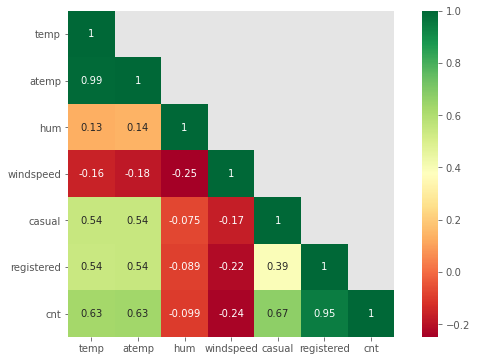

In [64]:
# Plotting heatmap with masked data
plt.figure(figsize=[10,6])
mask[np.tril_indices_from(mask)] = False
sns.heatmap(cor, cmap='RdYlGn', annot=True, square=True, mask=mask)
plt.show()

**Observations**
- There is a positive correlation between `temp` and `atemp`. We should look at dropping one of these columns later on
- There is a positive correlation between `cnt` and `registered`. We should look at dropping `registered` later on
- There is a positive correlation between `cnt` and `casual`. We should look at dropping `casual` later on
- There is a negative correlation between `temp`,`atemp`,`hum` and `windspeed`
- There is a slight negative correlation between `hum` and `casual`,`registered` and `cnt`. This means that if the humidity increases, it reduces bike rentals
- There is a negative correlation between `windspeed` and `casual`,`registered` and `cnt`. This means that if the windspeed increases, it reduces bike rentals

**Columns to be removed**
As a general rule, to avoid Multi-Collinearity, we will remove the columns which have correlation between -0.7 to +0.7. Looking at the heatmap above, the following columns will be removed
1. `temp`
2. `casual` (though correlation is 0.67, it's ~0.7 and we will remove this column)
3. `registered`

# Dropping multi-collinear columns

### 'temp','casual','registered'

In [65]:
df.drop(['temp','casual','registered'],axis=1,inplace=True)

In [66]:
# Checking the dataframe after dropping multi-collinear columns
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,2018,Jan,no,Mon,yes,Mist,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,no,Tue,yes,Mist,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,no,Wed,yes,Clear,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,no,Thu,yes,Clear,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,no,Fri,yes,Clear,11.46350,43.6957,12.522300,1600


# Data Preparation

## Create OHE (One Hot Encoding) on categorical columns

In [67]:
# Getting list of categorical columns
df_categorical = df.select_dtypes(include='object')

In [68]:
df_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [69]:
# OHE on categorical columns
df_dummies = pd.get_dummies(df_categorical,drop_first=True)

In [70]:
df_dummies.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,holiday_yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_yes,weathersit_LightSnow,weathersit_Mist
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Drop the original categorical columns from the dataframe

In [71]:
df.drop(list(df_categorical.columns),axis=1,inplace=True)

In [72]:
df.head()

,atemp,hum,windspeed,cnt
0,18.18125,80.5833,10.749882,985
1,17.68695,69.6087,16.652113,801
2,9.47025,43.7273,16.636703,1349
3,10.60610,59.0435,10.739832,1562
4,11.46350,43.6957,12.522300,1600


### Merge `df` and `df_dummies` dataframe

In [73]:
df = pd.concat([df,df_dummies],axis=1)

In [74]:
df.head()

,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_yes,weathersit_LightSnow,weathersit_Mist
0,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [75]:
df.shape

(730, 29)

## Divide data into `X` and `y` for building the model

In [76]:
X = df.drop('cnt',axis=1)
y = df.cnt

In [77]:
X.head()

,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_yes,weathersit_LightSnow,weathersit_Mist
0,18.18125,80.5833,10.749882,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,17.68695,69.6087,16.652113,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,9.47025,43.7273,16.636703,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,10.60610,59.0435,10.739832,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,11.46350,43.6957,12.522300,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [78]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

## Split data into `train` and `test` sets

In [79]:
# Import sklearn library for train_test_split
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [81]:
print(X_train.shape)
print(X_test.shape)

(584, 28)
(146, 28)


In [82]:
print(y_train.shape)
print(y_test.shape)

(584,)
(146,)


In [83]:
# Getting the list of numerical features from X_train
num_feat = list(X_train.describe().columns)
print(num_feat)
print(len(num_feat))

['atemp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'holiday_yes', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'workingday_yes', 'weathersit_LightSnow', 'weathersit_Mist']
28


## Applying Standard Scaling on the numerical features

**Best practices**
- Scaling order:
    1. StandardScaler (Converts to Normal Distribution)
    2. MinMaxScaler (Converts values from 0 to 1)
    3. RobustScaling

In [84]:
# Import sklearn library for StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate an object of StandardScaler
sc = StandardScaler()

# Perform fit and transform on the X_train dataset
X_train[num_feat] = sc.fit_transform(X_train[num_feat])

# Perform only transform on the X_test dataset
X_test[num_feat] = sc.transform(X_test[num_feat])

In [85]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 239 to 684
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   atemp                 584 non-null    float64
 1   hum                   584 non-null    float64
 2   windspeed             584 non-null    float64
 3   season_spring         584 non-null    float64
 4   season_summer         584 non-null    float64
 5   season_winter         584 non-null    float64
 6   yr_2019               584 non-null    float64
 7   mnth_Aug              584 non-null    float64
 8   mnth_Dec              584 non-null    float64
 9   mnth_Feb              584 non-null    float64
 10  mnth_Jan              584 non-null    float64
 11  mnth_Jul              584 non-null    float64
 12  mnth_Jun              584 non-null    float64
 13  mnth_Mar              584 non-null    float64
 14  mnth_May              584 non-null    float64
 15  mnth_Nov             

In [86]:
X_train.head()

,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_yes,weathersit_LightSnow,weathersit_Mist
239,1.079889,-0.460004,1.494191,-0.558891,-0.593171,-0.577350,-0.989778,3.268027,-0.30933,-0.278372,...,-0.167836,-0.404162,-0.407024,-0.407024,-0.424026,2.439750,-0.395519,0.664812,-0.156721,-0.710742
97,-0.896778,1.498668,0.480773,-0.558891,1.685854,-0.577350,-0.989778,-0.305995,-0.30933,-0.278372,...,-0.167836,-0.404162,-0.407024,2.456857,-0.424026,-0.409878,-0.395519,-1.504184,-0.156721,1.406980
503,0.584616,-1.212939,-1.385350,-0.558891,1.685854,-0.577350,1.010327,-0.305995,-0.30933,-0.278372,...,-0.167836,-0.404162,-0.407024,2.456857,-0.424026,-0.409878,-0.395519,-1.504184,-0.156721,-0.710742
642,0.665759,0.009068,-1.093395,-0.558891,-0.593171,1.732051,1.010327,-0.305995,-0.30933,-0.278372,...,-0.167836,-0.404162,2.456857,-0.407024,-0.424026,-0.409878,-0.395519,-1.504184,-0.156721,-0.710742
498,0.480687,1.165661,0.294182,-0.558891,1.685854,-0.577350,1.010327,-0.305995,-0.30933,-0.278372,...,-0.167836,-0.404162,-0.407024,-0.407024,-0.424026,2.439750,-0.395519,0.664812,-0.156721,1.406980


# Building base model

In [87]:
# From sklearn library import LinearRegression
from sklearn.linear_model import LinearRegression

In [88]:
# Base model
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [89]:
# Checking Coefficients for all features
coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])
coeff

,Coefficients
atemp,797.157433
hum,-250.777866
windspeed,-214.564481
season_spring,-351.151414
season_summer,10.011110
season_winter,277.519752
yr_2019,973.950336
mnth_Aug,12.210741
mnth_Dec,-147.475501
mnth_Feb,-99.710664


In [90]:
# Checking the Intercept
print(regressor.intercept_)

4492.518835616438


In [91]:
# Making predictions on X_test using the model
y_pred = regressor.predict(X_test)

In [92]:
# Showing the actual and predicted values side-by-side
df_result = pd.DataFrame( {'Actual': y_test,'Predicted':y_pred} )

df_result

,Actual,Predicted
196,5923,4047.472495
187,4592,4658.252816
14,1248,1136.061480
31,1360,1170.165137
390,4075,3716.927654
...,...,...
118,4595,4402.847629
566,4459,3717.747852
688,5634,5113.852478
266,5423,4809.937449


In [93]:
# From sklearn library import r2_score (To get r-squared value)
from sklearn.metrics import r2_score

In [94]:
r2_score(y_test,y_pred)

0.871299002531431

**Observations**
- Initial model has a good R2 score of 87.13%
- However there could be many columns which are either
    - multi-collinear
    - have high p-value
    - have high VIF
- To find the right model, we will have to only use those features which don't have any of the above and influence the model independently
- For this, we will use RFE (Recursive feature elimination) approach

# First Model

## Building first model using RFE

In [95]:
# From sklearn library importing RFE
from sklearn.feature_selection import RFE

In [96]:
len(X_train.columns)

28

In [97]:
# Out of 28 features, we will choose 20 features to start with initially

In [98]:
# Instantiating a LinearRegression object
lm = LinearRegression()
lm.fit(X_train,y_train)

# RFE
rfe = RFE(lm,20)
# Running RFE
rfe = rfe.fit(X_train,y_train)

In [99]:
# Checking list of selections and ranking of each variable by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 9),
 ('mnth_Mar', False, 5),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 6),
 ('mnth_Sep', True, 1),
 ('holiday_yes', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 4),
 ('weekday_Tue', False, 2),
 ('weekday_Wed', False, 3),
 ('workingday_yes', True, 1),
 ('weathersit_LightSnow', True, 1),
 ('weathersit_Mist', True, 1)]

In [100]:
# Looking at only the 20 variables selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['atemp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'yr_2019', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May',
       'mnth_Nov', 'mnth_Sep', 'holiday_yes', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'workingday_yes', 'weathersit_LightSnow',
       'weathersit_Mist'],
      dtype='object')

In [101]:
# Looking at the variables  which were NOT selected by RFE
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_Aug', 'mnth_Jun', 'mnth_Mar', 'mnth_Oct',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

## Building using statsmodels for the detailed statistics

In [102]:
# Creating a dataframe "X_train_rfe" with variables selected by RFE
X_train_rfe = X_train[col]

In [103]:
X_train_rfe.shape

(584, 20)

In [104]:
# Importing required statsmodels library
import statsmodels.api as sm
# From statsmodels importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [105]:
# Functions to build model using statsmodels and check VIF
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [106]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     142.2
Date:                Wed, 11 Aug 2021   Prob (F-statistic):          5.78e-205
Time:                        02:06:43   Log-Likelihood:                -4708.8
No. Observations:                 584   AIC:                             9460.
Df Residuals:                     563   BIC:                             9551.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4492.5188 

### Drop the columns which have p-value > 0.05 and building second model

#### weekday_Sun (p-value = 0.462)

In [107]:
X_train_rfe = X_train_rfe.drop('weekday_Sun',axis=1)

In [108]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     149.8
Date:                Wed, 11 Aug 2021   Prob (F-statistic):          6.10e-206
Time:                        02:06:43   Log-Likelihood:                -4709.0
No. Observations:                 584   AIC:                             9458.
Df Residuals:                     564   BIC:                             9545.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4492.5188 

#### weekday_Sat (p-value = 0.613) and building third model

In [109]:
X_train_rfe = X_train_rfe.drop('weekday_Sat',axis=1)

In [110]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     158.3
Date:                Wed, 11 Aug 2021   Prob (F-statistic):          5.42e-207
Time:                        02:06:43   Log-Likelihood:                -4709.2
No. Observations:                 584   AIC:                             9456.
Df Residuals:                     565   BIC:                             9539.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4492.5188 

#### weekday_Mon (p-value = 0.114) and building fourth model

In [111]:
X_train_rfe = X_train_rfe.drop('weekday_Mon',axis=1)

In [112]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     167.0
Date:                Wed, 11 Aug 2021   Prob (F-statistic):          1.43e-207
Time:                        02:06:44   Log-Likelihood:                -4710.5
No. Observations:                 584   AIC:                             9457.
Df Residuals:                     566   BIC:                             9536.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4492.5188 

### Drop the columns which have high VIF (VIF > 10)

In [113]:
checkVIF(X_train_new)

,Features,VIF
4,season_spring,3.82
1,atemp,3.67
5,season_winter,2.45
9,mnth_Jan,2.20
2,hum,2.19
8,mnth_Feb,1.91
12,mnth_Nov,1.75
17,weathersit_Mist,1.69
7,mnth_Dec,1.60
10,mnth_Jul,1.39


**Note**

All the columns have VIF < 10. So, we will not drop any of them and proceed further

In [114]:
names = X_train_rfe.columns
names

Index(['atemp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'yr_2019', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May',
       'mnth_Nov', 'mnth_Sep', 'holiday_yes', 'workingday_yes',
       'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

In [115]:
for i in range(0, len(names)):
    y = X_train_rfe.loc[:, X_train_rfe.columns == names[i]]
    x = X_train_rfe.loc[:, X_train_rfe.columns != names[i]]
    model = sm.OLS(y, x)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print(
        "R Square value of {} column is {} keeping all other columns as features".format(
            names[i], (round(rsq, 2))
        )
    )
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            names[i], vif)
        )

R Square value of atemp column is 0.73 keeping all other columns as features
Variance Inflation Factor of atemp column is 3.67 

R Square value of hum column is 0.54 keeping all other columns as features
Variance Inflation Factor of hum column is 2.19 

R Square value of windspeed column is 0.17 keeping all other columns as features
Variance Inflation Factor of windspeed column is 1.21 

R Square value of season_spring column is 0.74 keeping all other columns as features
Variance Inflation Factor of season_spring column is 3.82 

R Square value of season_winter column is 0.59 keeping all other columns as features
Variance Inflation Factor of season_winter column is 2.45 

R Square value of yr_2019 column is 0.05 keeping all other columns as features
Variance Inflation Factor of yr_2019 column is 1.05 

R Square value of mnth_Dec column is 0.37 keeping all other columns as features
Variance Inflation Factor of mnth_Dec column is 1.6 

R Square value of mnth_Feb column is 0.48 keeping al

# Final Model

In [116]:
# 1. Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# 2. Create model
lr = sm.OLS(y_train,X_train_lm)

# 3. Fit the model
lm = lr.fit()

# 4. View the parameters
lm.params

const                   4492.518836
atemp                    805.193246
hum                     -259.477283
windspeed               -220.454617
season_spring           -342.039939
season_winter            282.452248
yr_2019                  978.090487
mnth_Dec                -165.377860
mnth_Feb                -111.697569
mnth_Jan                -156.237538
mnth_Jul                -139.770478
mnth_May                  80.987907
mnth_Nov                -184.891752
mnth_Sep                 134.864617
holiday_yes             -103.977863
workingday_yes          -118.752782
weathersit_LightSnow    -253.531620
weathersit_Mist         -198.151595
dtype: float64

In [117]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     167.0
Date:                Wed, 11 Aug 2021   Prob (F-statistic):          1.43e-207
Time:                        02:06:44   Log-Likelihood:                -4710.5
No. Observations:                 584   AIC:                             9457.
Df Residuals:                     566   BIC:                             9536.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4492.5188     32.383    138.731      0.000    4428.913    4556.124
atemp                  805.1932     62.023     12.982      0.000     683.369     927.017
hum                   -259.4773     47.911     -5.416      0.000    -353.583    -165.371
windspeed             -220.4546     35.633     -6.187      0.000    -290.444    -150.466
season_spring         -342.0399     63.251     -5.408      0.000    -466.275    -217.805
season_winter          282.4522     50.670      5.574      0.000     182.928     381.977
yr_2019                978.0905     33.159     29.497      0.000     912.961    1043.220
mnth_Dec              -165.3779     40.961     -4.037      0.000    -245.833     -84.923
mnth_Feb              -111.6976     44.806     -2.493      0.013    -199.704     -23.691
mnth_Jan              -156.2375     48.020     -3.254      0.001    -250.556     -61.919
mnth_Jul              -139.7705     38.212     -3.658      0.000    -214.826     -64.715
mnth_May                80.9879     36.170      2.239      0.026       9.943     152.032
mnth_Nov              -184.8918     42.896     -4.310      0.000    -269.146    -100.638
mnth_Sep               134.8646     34.848      3.870      0.000      66.417     203.312
holiday_yes           -103.9779     33.788     -3.077      0.002    -170.342     -37.613
workingday_yes        -118.7528     33.914     -3.502      0.000    -185.365     -52.141
weathersit_LightSnow  -253.5316     37.888     -6.692      0.000    -327.950    -179.114
weathersit_Mist       -198.1516     42.050     -4.712      0.000    -280.745    -115.558
==============================================================================
Omnibus:                      105.551   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.057
Skew:                          -0.888   Prob(JB):                     2.31e-64
Kurtosis:                       5.981   Cond. No.                         4.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residual analysis of the train data

In [118]:
y_train_pred = lm.predict(X_train_lm)

In [119]:
y_train_pred.shape

(584,)

In [120]:
res = y_train - y_train_pred

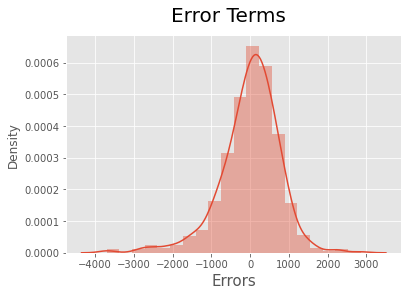

In [121]:
fig = plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=15)
plt.show()

In [122]:
# Checking the test and latest train dataset to understand the columns which have to be dropped
print(X_test.shape)
print(X_train_rfe.shape)

(146, 28)
(584, 17)


In [123]:
X_train_rfe.columns

Index(['atemp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'yr_2019', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May',
       'mnth_Nov', 'mnth_Sep', 'holiday_yes', 'workingday_yes',
       'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

In [124]:
# We will create a new dataframe "X_test_new" by removing the columns dropped by the train data set
X_test_new = X_test[names]

In [125]:
print(X_test_new.shape)

(146, 17)


In [126]:
X_test_new.head()

,atemp,hum,windspeed,season_spring,season_winter,yr_2019,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_May,mnth_Nov,mnth_Sep,holiday_yes,workingday_yes,weathersit_LightSnow,weathersit_Mist
196,1.020640,-0.294204,0.237423,-0.558891,-0.57735,-0.989778,-0.30933,-0.278372,-0.299253,3.419891,-0.31593,-0.305995,-0.274784,-0.167836,0.664812,-0.156721,-0.710742
187,1.317666,0.178544,-0.403795,-0.558891,-0.57735,-0.989778,-0.30933,-0.278372,-0.299253,3.419891,-0.31593,-0.305995,-0.274784,-0.167836,-1.504184,-0.156721,-0.710742
14,-1.363429,-0.909667,-0.419936,1.789257,-0.57735,-0.989778,-0.30933,-0.278372,3.341656,-0.292407,-0.31593,-0.305995,-0.274784,-0.167836,0.664812,-0.156721,1.406980
31,-1.446424,1.450965,-1.786740,1.789257,-0.57735,-0.989778,-0.30933,3.592320,-0.299253,-0.292407,-0.31593,-0.305995,-0.274784,-0.167836,0.664812,-0.156721,1.406980
390,-0.703860,1.022945,-1.523390,1.789257,-0.57735,1.010327,-0.30933,-0.278372,3.341656,-0.292407,-0.31593,-0.305995,-0.274784,-0.167836,-1.504184,-0.156721,1.406980


In [127]:
# Add a constant
X_test_new = sm.add_constant(X_test_new)

In [128]:
# Making Predictions based on test data
y_test_pred = lm.predict(X_test_new)

In [129]:
y_test_pred.head()

196    4162.332956
187    4677.762498
14     1274.545479
31     1033.006674
390    3761.277612
dtype: float64

# Model Evaluation

In [130]:
# Evaluating the model on the test
r2 = r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.8680395113522027

In [131]:
n = X_test_new.shape[0]
p = len(names)

print(n,p)

146 17


In [132]:
# Calculating Adjusted R-squared on the test data
# Formula: (1-R2)*(n-1)/(n-p-1)
# n -> Sample size = 146
# p -> number of predictor variables = 1
Adj_r2 = 1-((1 - r2)*(n - 1))/(n - p -1)
print(Adj_r2)

0.8505135089536671


In [133]:
# Evaluating the model on the train
r2 = r2_score(y_true=y_train,y_pred=y_train_pred)
r2

0.8337764494804799

In [134]:
n = X_train_rfe.shape[0]
p = len(names)

print(n,p)

584 17


In [135]:
# Calculating Adjusted R-squared on the train data
# Formula: (1-R2)*(n-1)/(n-p-1)
# n -> Sample size = 584
# p -> number of predictor variables = 17
Adj_r2 = 1-((1 - r2)*(n - 1))/(n - p -1)
print(Adj_r2)

0.8287838693412011


**Observations**
- R2 on test set is 86.8% and on the training set is 83.4%
- Adjusted R2 on test set is 83.65% and on the training set is 82.87%
- This means that the model has generalized well on the test set

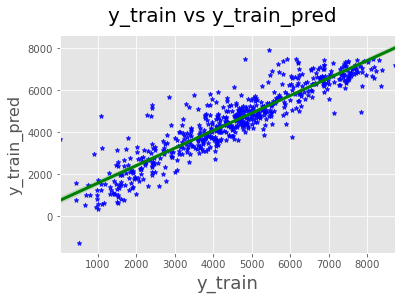

In [136]:
# Plotting graph b/w actual and predicted values with train data

fig = plt.figure()
# sns.scatterplot(y_test,y_test_pred)
sns.regplot(x=y_train,y=y_train_pred, scatter_kws = {"color": 'blue',"s": 20}, line_kws = {"color": 'green', "lw": 3}, marker='*')
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              
plt.xlabel('y_train', fontsize = 18)                          
plt.ylabel('y_train_pred', fontsize = 16)
plt.show()

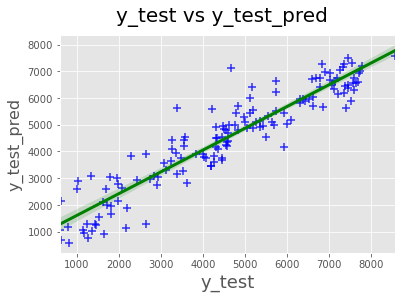

In [137]:
# Plotting graph b/w actual and predicted values with test data

fig = plt.figure()
# sns.scatterplot(y_test,y_test_pred)
sns.regplot(x=y_test,y=y_test_pred, scatter_kws = {"color": 'blue',"s": 50}, line_kws = {"color": 'green', "lw": 3}, marker='+')
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

**Calculate Root Mean Square Error**

In [138]:
# from sklearn import mean_squared_error
from sklearn.metrics import mean_squared_error

In [139]:
rmse = mean_squared_error(y_test, y_test_pred,squared=False)
rmse

764.3447823145879

**Calculate Root Mean Squared Logarithmic Error**

In [140]:
from sklearn.metrics import mean_squared_log_error
rmsle = np.sqrt(mean_squared_log_error( y_test, y_test_pred ))
rmsle

0.26244818037517736

# Model Summary

**Below are the list of significant variables in predicting the demand for shared bikes along with their coefficients**

In [141]:
lm.params

const                   4492.518836
atemp                    805.193246
hum                     -259.477283
windspeed               -220.454617
season_spring           -342.039939
season_winter            282.452248
yr_2019                  978.090487
mnth_Dec                -165.377860
mnth_Feb                -111.697569
mnth_Jan                -156.237538
mnth_Jul                -139.770478
mnth_May                  80.987907
mnth_Nov                -184.891752
mnth_Sep                 134.864617
holiday_yes             -103.977863
workingday_yes          -118.752782
weathersit_LightSnow    -253.531620
weathersit_Mist         -198.151595
dtype: float64


Hence the equation of our best fitted line is:

$ cnt = 4492.518836  \times  const + 805.193246  \times  atemp + -259.477283 \times hum + -220.454617 \times windspeed + -342.039939 \times season_spring + 282.452248 \times season_winter + 978.090487 \times yr_2019 + -165.377860 \times mnth_Dec + -111.697569 \times mnth_Feb + -156.237538 \times mnth_Jan + -139.770478 \times mnth_Jul + 80.987907 \times mnth_May + -184.891752 \times mnth_Nov + 134.864617 \times mnth_Sep + -103.977863 \times holiday_yes + -118.752782 \times workingday_yes + -253.531620 \times weathersit_LightSnow + -198.151595 \times weathersit_Mist $

**Remarks**
- R2 on test set is 86.8% and on the training set is 83.4%
- Adjusted R2 on test set is 85.05% and on the training set is 82.87%
- This means that the model has generalized well on the test set and is our best fit model